# Análise do período de um pêndulo planar simples

### Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
using Images
using Plots
using BenchmarkTools
using DifferentialEquations.OrdinaryDiffEq

## O pêndulo

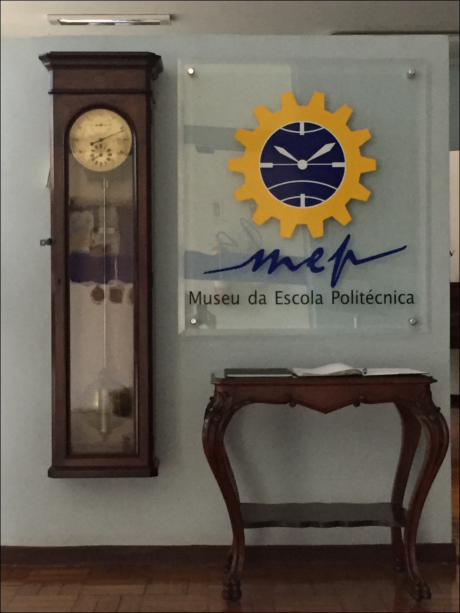

In [2]:
imresize(load(joinpath("img","pendulo_museu_politecnica.jpg")), ratio = 3/4)

## Um pêndulo esquematizado

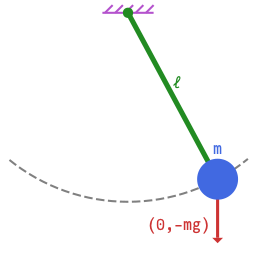

In [3]:
load(joinpath("img","pendulum_256x256.png"))

## O modelo clássico

* O modelo clássico para a oscilação do pêndulo é obtida assumindo-se que o movimento do pêndulo é planar e considerando-se o estado do sistema como definido unicamente pelo ângulo $\theta$, no sentido trigonométrico, que a haste faz com o eixo $y$ no sentido negativo, ou seja, com o vetor $-\mathbf{e}_2 = (0, -1)$.

* Os parâmetros considerados essenciais para problema são

  * O **comprimento** $\ell$ da haste do pêndulo
  
  * A **massa** $m$ do pêndulo
  
  * A aceleração da **gravidade** $g$

* Em um modelo inicial simplificado, desprezamos a **resistência do ar**; a **elasticidade** (mesmo que mínima) da haste; a variação na **temperatura** ambiente, que também altera o comprimento da haste; e o movimento possivelmente tridimensional do mesmo.

## Hipóteses e modelo

- A força da gravidade exercida no pêndulo é decomposta em compontentes tangencial e normal ao movimento circular do mesmo.
- A tensão na haste exerce uma força no objeto em direção ao ponto fixo da haste.
- Despreza-se qualquer outra força.
- Despreza-se a elasticidade da haste.
- A diferença entre a tensão e componente normal da força gravitacional é a aceleração centrípeta, responsável por manter o objeto em movimento circular.
- A componente tangencial causa o movimento circular.

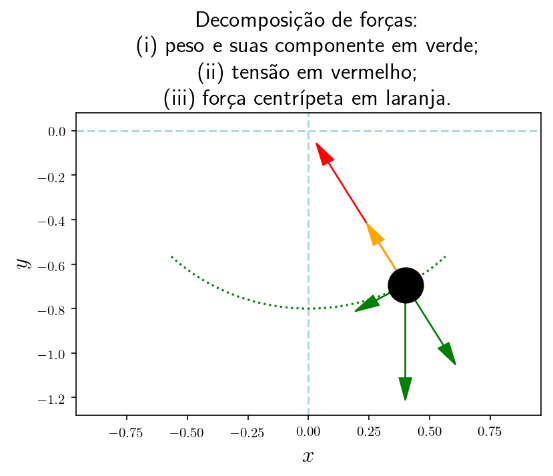

In [4]:
imresize(load(joinpath("img","pendulo_forcas.png")), ratio = 2/3)

## Modelo via leis de Newton

- $\omega=\dot\theta$ é a **velocidade angular** e $\dot\omega = \ddot\theta$ é a **aceleração angular**.
- $\ell\dot\theta$ é a **velocidade** (escalar, na direção do movimento) e $\ell\dot\theta$ é a **componente tangencial da aceleração**.
- $-mg\sin\theta$ é a **componente tangencial da força gravitacional**.
- A componente tangencial nos dá a **equação de movimento**

$$ m\ell\ddot\theta = - m g \sin\theta.
$$

- A velocidade $v = \ell\dot\theta$ dá a **magnitude da força centrípeta** $m v^2/2$, que, por sua vez, determina a **tensão** $mg\cos\theta + m v^2/2$ exercida na haste.

## Pequenas oscilações e aproximação linear do modelo

- Assumindo uma oscilação pequena, usamos a aproximação

$$ \sin\theta \approx \theta, \qquad (\text{para } |\theta| \ll 1 ).
$$

- Isso nos dá a equação linear de segunda ordem

$$ \ell\ddot\theta = - g \theta.
$$

- Suas soluções:

$$ \theta(t) = C_1 \sin\left(\sqrt{\frac{g}{\ell}} t\right) + C_2 \cos\left(\sqrt{\frac{g}{\ell}} t\right) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

com $A$ pequeno. O ângulo inicial é $\theta_0 = A\cos(B)$ e a velocidade angular inicial é $\omega_0 = A\sqrt{g/\ell}\sin(B)$, onde $A$ é a amplitude e $B$ é a fase temporal.

- No caso de um pêndulo "largado" de um ângulo $\theta_0$, temos $\omega_0 = 0$, de onde tiramos $A=\theta_0$ e $B=0$, com solução

$$ \theta(t) = \theta_0 \cos\left(\sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$


## Período de pequenas oscilações

* Da solução

$$ \theta(t) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

e da periodicidade do cosseno, extraímos o **período $T$ de oscilação**:

$$ \sqrt{\frac{g}{\ell}} T = 2\pi \quad \Longleftrightarrow \quad T = 2\pi\sqrt{\frac{\ell}{g}}.
$$

* Observe que esse resultado está de acordo com o resultado da análise dimensional feita ateriormente, que nos diz que 

$$ T \propto \sqrt{\frac{\ell}{g}}.
$$

## Pêndulo com grandes oscilações

* A expansão em série de Taylor do seno é

$$ \sin(\theta) = \theta - \frac{1}{3!}\theta^3 + \frac{1}{5!}\theta^5 - \cdots
$$

* Portanto, a aproximação $\sin(\theta) \approx \theta$ é válida para $|\theta| \ll 1$ e pode ser vista como uma aproximação de segunda ordem.

* Para oscilações grandes, no entanto, essa aproximação fica prejudicada.

* Levando isso em consideração, como isso afeta o período?

* Observe que 

$$ |\ddot\theta| = \frac{g}{\ell}|\sin(\theta)| < \frac{g}{\ell}|\theta|.
$$

* Com base nisso, vemos que a aceleração segundo o modelo não-linear é menor do que a do modelo linear.

* Portanto, podemos esperar que o período seja maior do que o período $2\pi \sqrt{\ell/g}$ previsto pelo modelo linear.

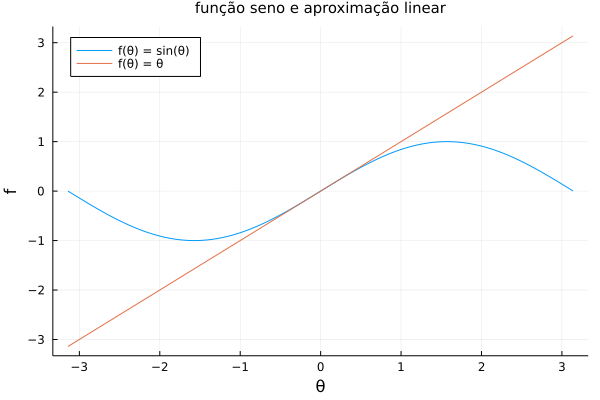

In [5]:
plot(title="função seno e aproximação linear", titlefont = 10,
    xaxis = "θ", yaxis = "f", legend = :topleft)
plot!(-π:0.01:π, [θ -> sin(θ); θ -> θ], label = ["f(θ) = sin(θ)" "f(θ) = θ"])

## Período do pêndulo

* Não esperamos mais que o período seja independente do ângulo de oscilação.

* Denotando por $\theta_{\max}$ o ângulo de oscilação máxima, escrevemos o período na forma

$$ T = T(\theta_{\max}, \ell, g).
$$

* Voltando à análise dimensional, lembremos que o conjunto de quatro parâmetros $\ell, g, T, \theta_{\max}$ possui dois grupos adimensionais, digamos

$$ \Pi_1 = T\sqrt{\frac{g}{\ell}}, \qquad \Pi_2 = \theta_{\max}.
$$

* Segue, ainda, do Teorema de Buckingham-Pi, que a relação $T = T(\theta_{\max}, \ell, g)$ pode ser escrito em uma versão adimensional

$$ \Pi_1 = \mathcal{T}(\Pi_2),
$$

ou seja,

$$ T = \mathcal{T}(\theta_{\max}) \sqrt{\frac{\ell}{g}}.
$$


### Mudança de escala

* Outra forma de obter a relação acima para o período é via mudança de escala no modelo não linear.

* Seja $\theta(t; \theta_{\textrm{max}}, \ell, g)$ uma solução de 

$$ \ell\ddot\theta = - g \sin(\theta).
$$

com ângulo máximo de oscilação $\theta_{\textrm{max}}$ e período de oscilação $T = T(\theta_{\textrm{max}}, \ell, g)$

* Defina, agora,

$$ \phi(\tau) = \theta(\tau t_0), \qquad \tau \in \mathbb{R},
$$

onde 

$$ t_0 = \sqrt{\frac{\ell}{g}}.
$$

* Observe que $t_0$ também tem unidade de tempo e $\tau\in \mathbb{R}$ é adimensional.

* Como $\theta$ tem período de oscilação $T$, então $\phi$ tem período de oscilação $\tau= \mathcal{T}$ dado por $\tau t_0 =T$, ou seja,

$$ \mathcal{T} = \frac{T}{t_0} = T\sqrt{\frac{g}{\ell}}.
$$

### Equação adimensionalizada

* Temos

$$ \ell \frac{\mathrm{d}^2 \phi(\tau)}{\mathrm{d}\tau^2} = \ell \frac{\mathrm{d}^2}{\mathrm{d}\tau^2} \theta(\tau t_0) =  \ell t_0^2 \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2}(\tau t_0) = - g t_0^2\sin(\theta(\tau t_0) = - g t_0^2\sin(\phi(\tau)).
$$

* Dividindo por $\ell$ e usando a definição de $t_0$, chegamos a

$$ \phi'' = -\sin(\phi).
$$

* Esta equação não tem parâmetro, o único parâmetro envolvido *na solução* $\phi$ é o ângulo de oscilação máxima $\theta_{\textrm{max}}$. Portanto, o seu período de oscilação só pode depender de $\theta_{\textrm{max}}$, digamos

$$ \mathcal T(\theta_{\textrm{max}}).
$$

### Período

* Assim, obtemos a relação

$$ T\sqrt{\frac{g}{\ell}} = \mathcal T(\theta_{\textrm{max}}),
$$

ou seja

$$ T(\theta_{\textrm{max}}, \ell, g) = \mathcal T(\theta_{\textrm{max}}) \sqrt{\frac{\ell}{g}}.
$$

### Conservação de energia e Hamiltoniano

* O pêndulo simples é um sistema conservativo.

* A sua equação de segunda ordem pode ser colocada como um sistema de primeira ordem,

$$ \begin{cases}
  \dot \theta = \omega, \\
  \dot \omega = -\frac{g}{\ell}\sin\theta.
\end{cases}
$$

* E pode ser visto como um sistema Hamiltoniano

$$ \begin{cases}
  \dot \theta = \displaystyle \frac{\partial H}{\partial\omega}(\theta, \omega), \\
  \dot \omega = \displaystyle -\frac{\partial H}{\partial\theta}(\theta, \omega).
\end{cases}
$$

com Hamiltoniano

$$ H(\theta, \omega) = \frac{1}{2}\omega^2 - \frac{g}{\ell}\cos\theta.
$$

* O Hamiltoniano tem a propriedade de ser conservado ao longo das órbitas:

$$ H(\theta(t), \omega(t)) = \textrm{constante em } t\in\mathbb{R}.
$$

com a constante dependendo da órbita, ou seja, dependendo do ângulo máximo $\theta_{\textrm{max}}$ (caso ele, de fato, oscile, ao invés de girar continuamente em torno do extremo fixo).


### Fórmula para a velocidade angular

* Considerando o caso em que o pêndulo oscile com ângulo máximo $\theta_{\textrm{max}}$, temos que a velocidade angular $\omega$ se anula no momento em que esse ângulo é alcançado, de modo que

$$ H(\theta(t), \omega(t)) = H(\theta_{\textrm{max}}, 0) = - \frac{g}{\ell}\cos\theta_{\textrm{max}}.
$$

* Portanto,

$$ \frac{1}{2}\omega(t)^2 - \frac{g}{\ell}\cos\theta(t) = - \frac{g}{\ell}\cos\theta_{\textrm{max}}.
$$

* Isso nos leva a

$$ \frac{\mathrm{d}\theta}{\mathrm{d}t}(t) = \omega(t) = \pm \sqrt{ \frac{2g}{\ell}\left(\cos(\theta(t)) - \cos(\theta_{\textrm{max}})\right)}
$$

### Fórmula para o período

* Quando $\dot\theta(t) \neq 0$, obtemos do Teorema da Função Inversa que $t\mapsto \theta(t)$ é localmente invertível, $t = t(\theta)$, com $\dot t = 1 / \dot \theta$.

* Mais precisamente,

$$ \frac{\mathrm{d}t(\theta)}{\mathrm{d}\theta} = \frac{1}{\displaystyle \frac{\mathrm{d}\theta}{\mathrm{d}t}(t(\theta))}.
$$

* Da fórmula para a velocidade angular, e usando que $\theta(t(\theta)) = \theta$, obtemos

$$ \frac{\mathrm{d}t}{\mathrm{d}\theta}(\theta) = \pm \frac{1}{\displaystyle \sqrt{ \frac{2g}{\ell}\left(\cos\theta - \cos\theta_{\textrm{max}}\right)}}.
$$

* Quando o ângulo varia de $\theta_{\textrm{max}} > 0$ a $0$, o tempo decorre um quarto do período. Assim, o período é dado por

$$ T(\theta_{\textrm{max}}, \ell, g) = 4 \int_{\theta_{\textrm{max}}}^0 \frac{\mathrm{d}t}{\mathrm{d}\theta}(\theta) \;\mathrm{d}\theta.
$$

* Nesse intervalo, a velocidade angular é negativa. Assim, usando a fórmula para a velocidade angular, escrevemos

$$ T(\theta_{\textrm{max}}, \ell, g) = - 4 \int_{\theta_{\textrm{max}}}^0 \frac{1}{\displaystyle \sqrt{ \frac{2g}{\ell}\left(\cos\theta - \cos\theta_{\textrm{max}}\right)}} \;\mathrm{d}\theta.
$$

* Podemos reescrever isso e obter a fórmula final para o período:

$$ T(\theta_{\textrm{max}}, \ell, g) = 4 \sqrt{\frac{\ell}{2g}}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$

* Mais uma vez, observe que isso é da forma

$$ T(\theta_{\textrm{max}}, \ell, g) = \sqrt{\frac{\ell}{g}} \mathcal T(\theta_{\textrm{max}}),
$$

com

$$ \mathcal T(\theta_{\textrm{max}}) = 2\sqrt{2}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$

### Aproximando a fórmula integral do período

* A fórmula de $\mathcal T(\theta_{\textrm{max}})$ envolve uma integral elíptica completa, do primeiro tipo.

* Existem expressões em termos de expansão em séries de potências ou de cossenos ou de quadrados de senos ou de polinômios de Legendre, etc., mas não existem fórmulas fechadas em termos de funções elementares.

* Outra fórmula é via média aritmética-geométrica:

$$ \mathcal T(\theta_{\textrm{max}}) = \frac{2\pi}{\mathop{AGM}(1, \cos(\theta_{\textrm{max}}/2))},
$$

onde $\mathop{AGM}(a, b)$ é a função média aritmética-geométrica entre $a$ e $b$.

* Mais geralmente, 

$$ T(\theta_{\textrm{max}}) = \frac{T_p}{\mathop{AGM}(1, \cos(\theta_{\textrm{max}}/2))},
$$

onde

$$ T_p = 2\pi \sqrt{\frac{\ell}{g}}.
$$


### Período em termos de séries de potências pares

* O período $T(\theta_0, \ell, g)$ pode ser expresso como

$$
{\displaystyle T=2\pi {\sqrt {\frac {\ell}{g}}}\left[\sum _{n=0}^{\infty }\left({\frac {\left(2n\right)!}{2^{2n}\left(n!\right)^{2}}}\right)^{2}\sin ^{2n}\left({\frac {\theta _{0}}{2}}\right)\right]=2\pi {\sqrt {\frac {\ell}{g}}}\left(1+{\frac {1}{16}}\theta _{0}^{2}+{\frac {11}{3072}}\theta _{0}^{4}+\cdots \right)}
$$

In [6]:
coef(n::Int) = (factorial(2*n)/ 4^n / factorial(n)^2 )^2

coef (generic function with 1 method)

In [7]:
function 𝒯_s(θ, N)
    r = 0.0
    for n in 0:N
        r += coef(n) * sin(θ / 2)^(2n)
    end
    return 2π * r
end

𝒯_s (generic function with 1 method)

In [8]:
# Wiki pendulo (math), https://oeis.org/A223068/list
denoms = [
    1, 16, 3072, 737280, 1321205760, 951268147200, 2009078326886400, 265928913086054400,
    44931349155019751424000, 109991942731488351485952000, 668751011807449177034588160000,
    2471703739640332158319837839360000
]

#https://oeis.org/A223067/list
numers = [
    1, 1, 11, 173, 22931, 1319183, 233526463, 2673857519, 39959591850371,
    8797116290975003, 4872532317019728133, 1657631603843299234219
    ]

cis = numers ./ denoms

function 𝒯_pol(t::Real)
    r = 0.0
    for i in eachindex(cis)
        r += cis[i] * t^(2(i-1))
    end
    return 2π * r
end

𝒯_pol (generic function with 1 method)

### Média aritmética-geométrica

* A função média aritmética-geométrica se define por um algoritmo simples: 

  * Consideramos a operacao $M: (a,b) \mapsto ((a+b)/2 , \sqrt{ab})$ (media aritmética, media geométrica);

  * Aplicamos $M$ iterativamente;

  * Prova-se que $M^n(a,b) = (y,y)$ para algum $n$ finito, com a convergencia sendo quadrática, muito rapida, com o número de dígitos corretos no mínimo duplicando a cada iteração.

  * Define-se $\mathop{AGM}(a,b) = y$

* Na prática, podemos parar as iterações quando $M^n(a,b) = (y_1, y_2)$ com $y_1 \approx y_2$ com um dado grau de precisão pré-estabelecido (e.g.: 10 casas decimais).

### Implementando a função média aritmética-geométrica

In [9]:
# definindo a função AGM

function medias(a::Real, b::Real)
    (a ≥ 0 && b ≥ 0) || throw(ArgumentError("arguments must be nonnegative"))
    ma = (a + b)/2
    mg = sqrt(a * b)
    return ma, mg
end

function agm(a::Real, b::Real; tol::Real = 1e-10, maxiter::Int = 100)
    tol > 0 || throw(ArgumentError("tolerance must be positive"))
    maxiter > 0 || throw(ArgumentError("maximum number of iterations must be positive"))
    y1, y2 = a, b
    n = 0
    while abs(y1 - y2) > tol && n < maxiter
        y1, y2 = medias(y1, y2)
        n += 1
    end
    return (y1 + y2)/2, abs(y1 - y2), n
end

println(agm(1, 2))
println(agm(1, 2, tol = 1e-5))
println(agm(12.345, 98.765))
println(agm(12.345, 98.765, tol = 1e-5))
println(agm(1, cos(0.001)))
println(agm(1,1000))

(1.4567910310469068, 0.0, 4)
(1.4567910310469068, 3.421470373687896e-8, 3)
(44.63812979234222, 0.0, 5)
(44.63812979234222, 4.441749013039953e-8, 4)
(0.9999997500000053, 3.11972669919669e-14, 1)
(189.38830240995088, 2.842170943040401e-14, 6)


In [10]:
𝒯(θ_max) = 2π / agm(1, cos(θ_max / 2))[1]

𝒯 (generic function with 1 method)

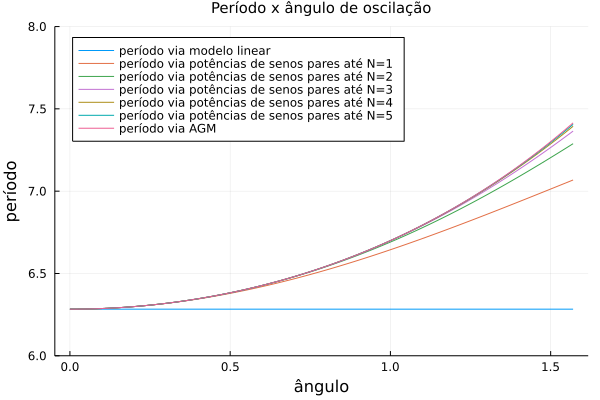

In [11]:
θ = 0:0.01:π/2
plot(title = "Período x ângulo de oscilação", titlefont = 10,
    xaxis = "ângulo", yaxis = "período", 
    ylims = (6.0, 8.0), legend=:topleft
    )
plot!(θ, θ -> 2π, label = "período via modelo linear")
for N in 1:5
    plot!(θ, θ -> 𝒯_s(θ, N), label="período via potências de senos pares até N=$N")
end
plot!(θ, 𝒯, label="período via AGM")

In [12]:
@btime $(2π)
for N in 1:5
    @btime 𝒯_s($(π/4)/2, $N)
end
@btime 𝒯($(π/4))
nothing

  0.055 ns (0 allocations: 0 bytes)
  38.701 ns (0 allocations: 0 bytes)
  95.200 ns (0 allocations: 0 bytes)
  144.404 ns (0 allocations: 0 bytes)
  191.229 ns (0 allocations: 0 bytes)
  239.553 ns (0 allocations: 0 bytes)
  25.015 ns (0 allocations: 0 bytes)


### Comparando as aproximações via AGM e via linear

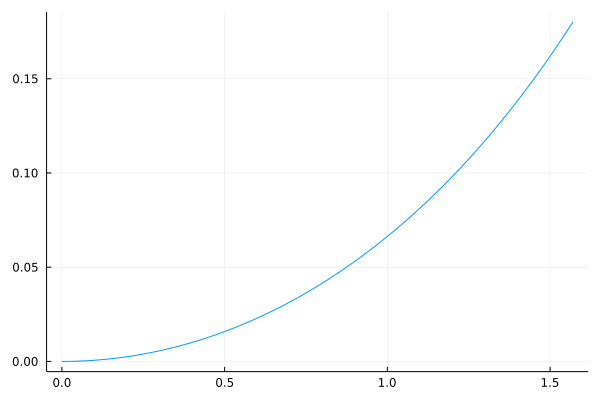

In [13]:
plot(θ, θ -> (𝒯(θ) - 2π)/2π, label=nothing)

* Qual o ângulo máximo em que a diferença (absoluta) entre $\sin\theta$ e $\theta$ é de 1%?

In [14]:
θ₁ = round(rad2deg(maximum(filter(θ -> abs(sin(θ) - θ) ≤ 0.01, 0.001:0.001:π/2))), digits = 2)
println("Ângulo máximo: $(θ₁)°")

Ângulo máximo: 22.46°


* Qual o ângulo máximo em que a diferença (relativa) entre os períodos calculados via média aritmética-geométrica e via aproximação linear é de 1%?

In [15]:
θ₂ = round(rad2deg(maximum(filter(θ -> abs(𝒯(θ) - 2π)/2π ≤ 0.01, 0:0.001:π/2))), digits = 2)
println("Ângulo máximo: $(θ₂)°")

Ângulo máximo: 22.8°


* No entanto, à medida em que o pêndulo oscila, ao longo de vários períodos, esse erro acumula e aumenta consideravelmente.

In [16]:
function f_pendulo!(dω, ω, θ, p, t)
    ℓ, g = p
    dω .= - ( g / ℓ ) * sin.( θ )
    return dω
end

ℓ = 1.0
g = 9.8

tspan = 6 * 2π * √(ℓ / g) # aproximadamente seis ciclos

θ₀ = π / 4
ω₀ = 0.0

prob = SecondOrderODEProblem(f_pendulo!, [ω₀], [θ₀], tspan, [ℓ, g])
sol = solve(prob, KahanLi8(), dt=1/10)
println(sol.retcode)

Success


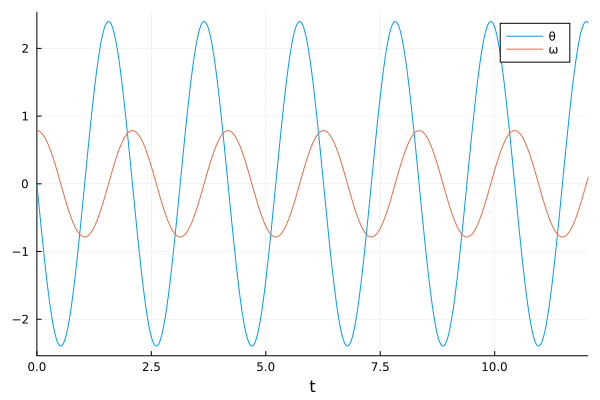

In [17]:
plot(sol, label = ["θ" "ω"], xaxis = "t")

In [1]:
angulos = (π / 20, π / 14, π / 10, π / 8, π / 6, π / 4, π / 3)
for θ₀ in angulos
    prob = SecondOrderODEProblem(f_pendulo!, [ω₀], [θ₀], tspan, [ℓ, g])
    lsol = solve(prob, KahanLi8(), dt = 0.02)
    p = plot(title = "angulo em graus: $(round(rad2deg(θ₀), digits = 2))°", titlefont = 10,
        xaxis = "t", yaxis = "θ (rad)", size = (600, 200), legend = :bottomleft)
    plot!(p, lsol, vars = 2, label = "modelo não linear")
    plot!(p, lsol.t, θ₀ * cos.( √(g/ℓ) * lsol.t ), label = "modelo linear")
    display(p)
end
    

LoadError: UndefVarError: ω₀ not defined

## Exercícios

1. Usando a fórmula
$$ \mathcal T(\theta_{\textrm{max}}) = 2\sqrt{2}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$
mostre que $\lim_{\theta_{\textrm{max}} \searrow 0} \mathcal{T}(\theta_{\textrm{max}}) = 2\pi$.

1. Mostre que $AGM(\lambda a, \lambda b) = \lambda AGM(a,b)$, para todo $\lambda > 0$.